In [110]:
%matplotlib inline

import h5py
import numpy as np
import pathlib
from utils.subsample import MaskFunc
import utils.transforms as T
from matplotlib import pyplot as plt

def show_slices(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

def get_training_pair(file, centre_fraction, acceleration):

    """


    :param file: The training image
    :param centre_fraction: randomly generated centre fraction
    :param acceleration: randomly generated
    :return:
    """


    hf = h5py.File(file)

    volume_kspace = hf['kspace'][()]
    volume_image = hf['reconstruction_esc'][()]
    mask_func = MaskFunc(center_fractions=[centre_fraction], accelerations=[acceleration])  # Create the mask function object

    volume_kspace_tensor = T.to_tensor(volume_kspace)
    masked_kspace, mask = T.apply_mask(volume_kspace_tensor, mask_func)
    masked_kspace_np=masked_kspace.numpy().reshape(masked_kspace.shape)

    return np.expand_dims(volume_image,3), masked_kspace_np


def get_training_pair_images(file, centre_fraction, acceleration, image_size=256):
    """
    :param file: The training image
    :param centre_fraction: randomly generated centre fraction
    :param acceleration: randomly generated
    :return: true gold standard and the fft of the masked k-space image
    """
    
    hf = h5py.File(file)
    volume_kspace = hf['kspace'][()]
    volume_image = hf['reconstruction_esc'][()]
    mask_func = MaskFunc(center_fractions=[centre_fraction], accelerations=[acceleration])  # Create the mask function object

    volume_kspace_tensor = T.to_tensor(volume_kspace)
    masked_kspace, mask =  T.apply_mask(volume_kspace_tensor, mask_func)
    ##masked_kspace_np=masked_kspace.numpy().reshape(masked_kspace.shape)
 
    volume_image=T.center_crop(volume_image, shape=[image_size,image_size])
    
    print(volume_image.shape)
    print(volume_image.shape[1])
    print(volume_image.shape[2])
    
    recon_image= T.ifft2(masked_kspace) 			 # complex image
    recon_image=T.complex_center_crop(recon_image, shape=[volume_image.shape[1],volume_image.shape[2]])

    volume_image, mean, std=T.normalize_instance(volume_image)    
    #recon_image=T.normalize_instance(recon_image)    
    
    
    recon_image_abs= T.complex_abs(recon_image)                # compute absolute value to get a real image
    #recon_image_rss= T.root_sum_of_square(recon_image_abs,dim=0) # compute absolute rss
    
    recon_image_abs, mean ,std =T.normalize_instance(recon_image_abs)
        
    
    return np.expand_dims(volume_image,3), recon_image_abs.numpy()


def get_random_accelerations():

   """
      : we apply these to fully sampled k-space to obtain q
      :return:random centre_fractions between 0.1 and 0.001 and accelerations between 1 and 15
   """
   acceleration = np.random.randint(1, high=8, size=1)
   centre_fraction = np.random.uniform(0, 1, 1)
   decimal = np.random.randint(1, high=3, size=1)
   centre_fraction = centre_fraction / (10 ** decimal)

   return float(centre_fraction), float(acceleration)





In [141]:
datadir= '/media/jehill/DATA/ML_data/fastmri/singlecoil/train/singlecoil_train/'
files = list(pathlib.Path(datadir).iterdir())



In [112]:
def train(file):
    #files = list(pathlib.Path(datadir).iterdir())
    #np.random.shuffle(files)
    #for file in files:
        print(file)
        centre_fraction,acceleration=get_random_accelerations()
        print("Centre Fraction is {}". format(centre_fraction))
        print("Acceleration {}". format(acceleration))
        print(acceleration)
        image, masked_kspace =get_training_pair_images(file, centre_fraction=centre_fraction,acceleration=acceleration)
        print(image.shape)
        print(masked_kspace.shape)
        plt.subplot(1,2,1)
        plt.imshow(masked_kspace[20,:,:], cmap='gray')
        plt.subplot(1,2,2)
        plt.imshow(image[20,:,:,0], cmap='gray')
        
        print(image.max())
        print(image.min())
        print(masked_kspace.min())
        print(masked_kspace.max())
                

/media/jehill/DATA/ML_data/fastmri/singlecoil/train/singlecoil_train/file1001810.h5
0.0034993829761196917
5.0
(34, 256, 256)
256
256
(34, 256, 256, 1)
(34, 256, 256)
7.3619804
-1.4876893
-2.0351024
4.60896


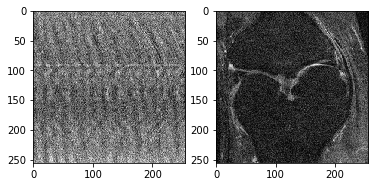

In [142]:
train(files[1])

/media/jehill/DATA/ML_data/fastmri/singlecoil/train/singlecoil_train/file1001810.h5
0.006241988128726415
7.0
(34, 256, 256)
256
256
(34, 256, 256, 1)
(34, 256, 256)
7.3619804
-1.4876893
-1.6762656
5.454783


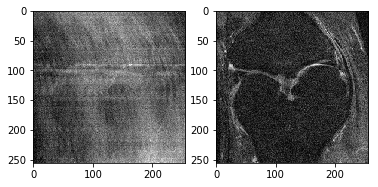

In [143]:
train(files[1])

/media/jehill/DATA/ML_data/fastmri/singlecoil/train/singlecoil_train/file1001810.h5
0.06818209197809573
2.0
(34, 256, 256)
256
256
(34, 256, 256, 1)
(34, 256, 256)
7.3619804
-1.4876893
-1.4557233
6.391298


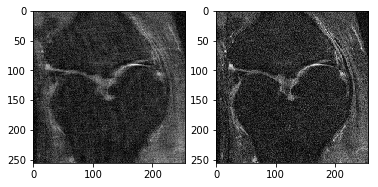

In [144]:
train(files[1])
#Lower acceleration: Note Random sampling 

/media/jehill/DATA/ML_data/fastmri/singlecoil/train/singlecoil_train/file1001568.h5
0.07420474316725519
1.0
(30, 256, 256)
256
256
(30, 256, 256, 1)
(30, 256, 256)
4.5231104
-1.2751516
-1.2751513
4.523109


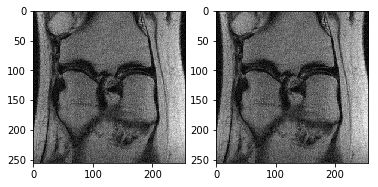

In [118]:
#Another image
train(files[100])

/media/jehill/DATA/ML_data/fastmri/singlecoil/train/singlecoil_train/file1001568.h5
0.06336792322096126
2.0
(30, 256, 256)
256
256
(30, 256, 256, 1)
(30, 256, 256)
4.5231104
-1.2751516
-1.2810655
4.0902324


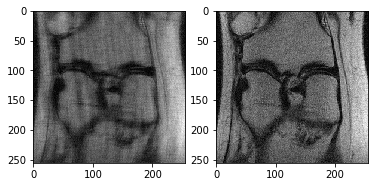

In [120]:
train(files[100])

/media/jehill/DATA/ML_data/fastmri/singlecoil/train/singlecoil_train/file1002516.h5
0.027542034750488952
3.0
(37, 256, 256)
256
256
(37, 256, 256, 1)
(37, 256, 256)
10.784242
-1.2002302
-1.2503273
6.0996337


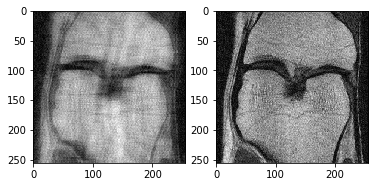

In [121]:
train(files[89])

/media/jehill/DATA/ML_data/fastmri/singlecoil/train/singlecoil_train/file1002516.h5
0.002980080720279401
2.0
(37, 256, 256)
256
256
(37, 256, 256, 1)
(37, 256, 256)
10.784242
-1.2002302
-1.5961597
7.2270436


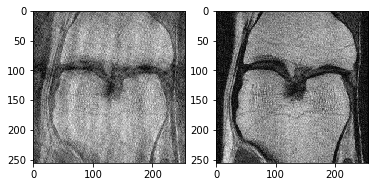

In [123]:
train(files[89])

In [124]:
import tensorflow as tf

In [128]:
def read_training_images(file):
    #files = list(pathlib.Path(datadir).iterdir())
    #np.random.shuffle(files)
    #for file in files:
        #print(file)
        centre_fraction,acceleration=get_random_accelerations()
        image, partial_images =get_training_pair_images(file, centre_fraction=centre_fraction,acceleration=acceleration)
        return image
            